In [127]:
import h5py

snap = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/snapshot_127.0.hdf5','r')

In [128]:
def printname(name):
    print (name)
snap.visit(printname)

Config
Header
Parameters
PartType0
PartType0/AllowRefinement
PartType0/Coordinates
PartType0/Density
PartType0/ElectronAbundance
PartType0/EnergyDissipation
PartType0/GFM_AGNRadiation
PartType0/GFM_CoolingRate
PartType0/GFM_Metallicity
PartType0/GFM_Metals
PartType0/GFM_RProcess
PartType0/GFM_WindDMVelDisp
PartType0/GFM_WindHostHaloMass
PartType0/HighResGasMass
PartType0/InternalEnergy
PartType0/Machnumber
PartType0/MagneticField
PartType0/MagneticFieldDivergence
PartType0/Masses
PartType0/NeutralHydrogenAbundance
PartType0/ParticleIDs
PartType0/Potential
PartType0/StarFormationRate
PartType0/Velocities
PartType1
PartType1/Coordinates
PartType1/Masses
PartType1/ParticleIDs
PartType1/Potential
PartType1/Velocities
PartType2
PartType2/Coordinates
PartType2/Masses
PartType2/ParticleIDs
PartType2/Potential
PartType2/Velocities
PartType3
PartType3/Coordinates
PartType3/Masses
PartType3/ParticleIDs
PartType3/Potential
PartType3/Velocities
PartType4
PartType4/BirthDensity
PartType4/BirthPos
P

In [37]:
snap.get('Header')

<HDF5 group "/Header" (0 members)>

In [34]:
list(snap.items())

[('Config', <HDF5 group "/Config" (0 members)>),
 ('Header', <HDF5 group "/Header" (0 members)>),
 ('Parameters', <HDF5 group "/Parameters" (0 members)>),
 ('PartType0', <HDF5 group "/PartType0" (23 members)>),
 ('PartType1', <HDF5 group "/PartType1" (5 members)>),
 ('PartType2', <HDF5 group "/PartType2" (5 members)>),
 ('PartType3', <HDF5 group "/PartType3" (5 members)>),
 ('PartType4', <HDF5 group "/PartType4" (15 members)>),
 ('PartType5', <HDF5 group "/PartType5" (31 members)>),
 ('PartType6', <HDF5 group "/PartType6" (2 members)>)]

In [2]:
%%time
import gc
import joblib
import h5py
import pathlib

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')


def load(path):
    with h5py.File(path,'r') as snap:
        pstr = snap['PartType4/Coordinates'][()]
        pdrk = snap['PartType1/Coordinates'][()]

    return {'StrPos': pstr, 'DrkPos': pdrk}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 5.44 s, sys: 15.1 s, total: 20.5 s
Wall time: 28.2 s


136

In [4]:
%%time
import numpy as np
pos_str = np.concatenate([r['StrPos']for r in results])
pos_drk = np.concatenate([r['DrkPos']for r in results])

CPU times: user 16.5 s, sys: 53.7 s, total: 1min 10s
Wall time: 2.46 s


In [5]:
np.shape(pos_str)

(29807015, 3)

In [47]:
%matplotlib inline

In [7]:
xstr = pos_str[:,0]
ystr = pos_str[:,1]
zstr = pos_str[:,2]

xdrk = pos_drk[:,0]
ydrk = pos_drk[:,1]
zdrk = pos_drk[:,2]

# r = np.sqrt(x**2 + y**2 + z**2)

# mask, = np.where(r<0.1)

CPU times: user 23.9 s, sys: 29.7 s, total: 53.6 s
Wall time: 27.8 s


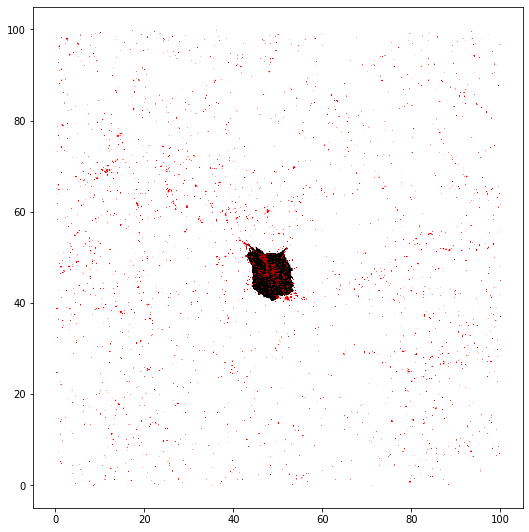

In [65]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk,ydrk,'.k',markersize=0.005)
ax.plot(xstr,ystr,'.r',markersize=0.008)


CPU times: user 26.6 s, sys: 22.8 s, total: 49.5 s
Wall time: 23.6 s


(40, 60)

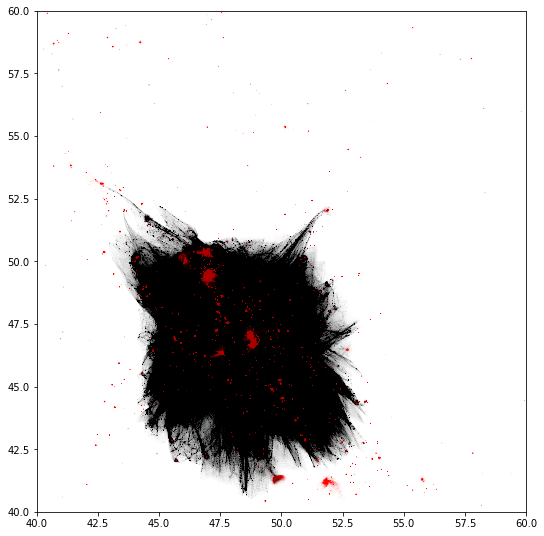

In [66]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk,ydrk,'.k',markersize=0.005)
ax.plot(xstr,ystr,'.r',markersize=0.008)
ax.set_xlim(40,60)
ax.set_ylim(40,60)

In [124]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')

In [125]:
def printname(name):
    print (name)
subhalo.visit(printname)

Config
Group
Group/GroupBHMass
Group/GroupBHMdot
Group/GroupCM
Group/GroupFirstSub
Group/GroupGasMetalFractions
Group/GroupGasMetallicity
Group/GroupLen
Group/GroupLenType
Group/GroupMass
Group/GroupMassType
Group/GroupNsubs
Group/GroupPos
Group/GroupRadioLuminosity
Group/GroupSFR
Group/GroupStarMetalFractions
Group/GroupStarMetallicity
Group/GroupVel
Group/GroupWindMass
Group/GroupXrayLuminosity
Group/Group_M_Crit200
Group/Group_M_Crit500
Group/Group_M_Mean200
Group/Group_M_TopHat200
Group/Group_R_Crit200
Group/Group_R_Crit500
Group/Group_R_Mean200
Group/Group_R_TopHat200
Header
IDs
Parameters
Subhalo
Subhalo/SubhaloBHMass
Subhalo/SubhaloBHMdot
Subhalo/SubhaloBfldDisk
Subhalo/SubhaloBfldHalo
Subhalo/SubhaloCM
Subhalo/SubhaloGasMetalFractions
Subhalo/SubhaloGasMetalFractionsHalfRad
Subhalo/SubhaloGasMetalFractionsMaxRad
Subhalo/SubhaloGasMetalFractionsSfr
Subhalo/SubhaloGasMetalFractionsSfrWeighted
Subhalo/SubhaloGasMetallicity
Subhalo/SubhaloGasMetallicityHalfRad
Subhalo/SubhaloGasMet

In [11]:
%%time
import gc
import joblib
import h5py
import pathlib

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127')


def load(path):
    with h5py.File(path,'r') as snap:
        sub_mass = snap['Subhalo/SubhaloMass'][()]
        sub_CM   = snap['Subhalo/SubhaloCM'][()]

    return {'SubMass': sub_mass, 'SubCM': sub_CM}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 63 ms, sys: 3.84 ms, total: 66.8 ms
Wall time: 162 ms


142

In [23]:
%%time
import numpy as np
Smass = np.concatenate([r['SubMass']for r in results])
Scm   = np.concatenate([r['SubCM']for r in results])

CPU times: user 1.05 ms, sys: 1.1 ms, total: 2.15 ms
Wall time: 1.48 ms


In [24]:
sort = np.argsort(Smass)

In [69]:
SMass = Smass[sort][::-1]*1e10
print (SMass[:20])

[1.57527586e+12 1.16998734e+12 5.75789335e+11 5.55212800e+11
 2.35702452e+11 1.81163065e+11 1.61315209e+11 1.48673790e+11
 1.44135864e+11 1.43819964e+11 1.33386396e+11 1.26789853e+11
 1.21189327e+11 1.01114544e+11 9.09461750e+10 8.68756685e+10
 7.65613261e+10 7.44905114e+10 7.35222088e+10 6.67219395e+10]


In [70]:
SCM = Scm[sort][::-1]
print (SCM[:20,:])

[[48.82009  46.723328 53.597187]
 [48.716347 47.062702 53.338043]
 [46.97764  49.45291  51.766094]
 [47.52763  46.363068 54.831375]
 [47.32753  47.25789  51.91318 ]
 [47.791542 47.557568 53.32627 ]
 [47.411304 48.30691  52.662704]
 [49.867714 47.256065 52.22432 ]
 [45.625298 46.92564  54.10303 ]
 [48.524456 48.034508 51.99446 ]
 [46.999523 49.672398 51.440052]
 [46.847164 46.25087  55.3823  ]
 [46.910072 50.35484  50.48083 ]
 [47.56072  48.62583  52.290848]
 [46.062843 50.056206 51.221096]
 [49.60781  44.903294 55.674023]
 [50.032135 44.55581  56.25268 ]
 [46.8999   49.439217 51.809616]
 [49.736343 41.361874 58.553524]
 [46.81061  50.41416  50.400288]]


# Grafico el primer halo mas masivo

In [28]:
CM1  = SCM[0,:]
SUB1 = SMass[0]

print('mass=',SUB1,'CM=',CM1)

mass= 1575275900000.0 CM= [48.82009  46.723328 53.597187]


In [30]:
xstr1 = pos_str[:,0]-CM1[0]
ystr1 = pos_str[:,1]-CM1[1]
zstr1 = pos_str[:,2]-CM1[2]

xdrk1 = pos_drk[:,0]-CM1[0]
ydrk1 = pos_drk[:,1]-CM1[1]
zdrk1 = pos_drk[:,2]-CM1[2]

In [33]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
mask_str, = np.where(rstr<1)
mask_drk, = np.where(rdrk<1)

CPU times: user 14.5 s, sys: 5.56 s, total: 20 s
Wall time: 4.39 s


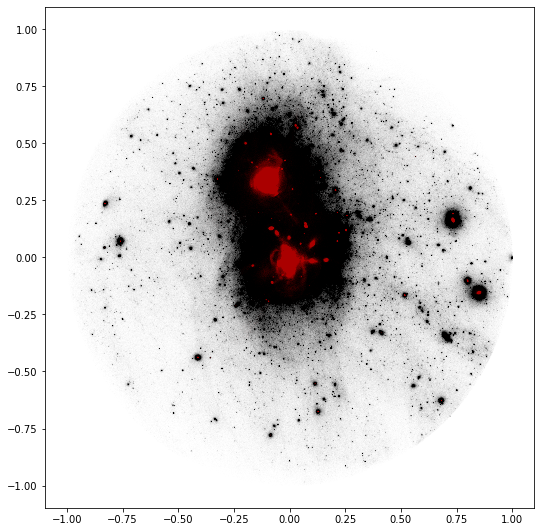

In [34]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.01)


In [35]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
mask_str, = np.where(rstr<0.25)
mask_drk, = np.where(rdrk<0.25)

CPU times: user 12.7 s, sys: 2.74 s, total: 15.4 s
Wall time: 1.76 s


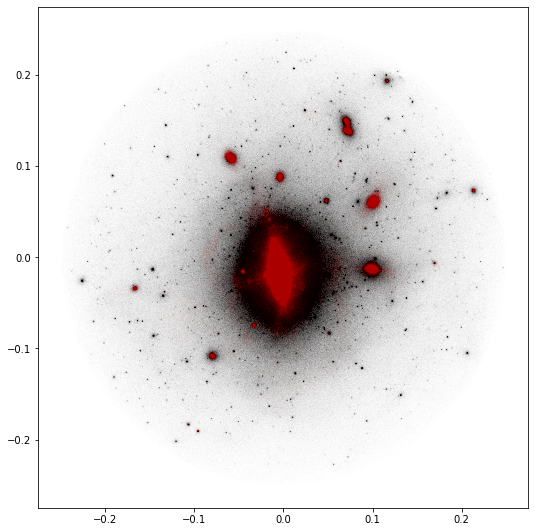

In [36]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.01)


In [37]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
mask_str, = np.where(rstr<0.05)
mask_drk, = np.where(rdrk<0.05)

CPU times: user 12 s, sys: 1.78 s, total: 13.8 s
Wall time: 884 ms


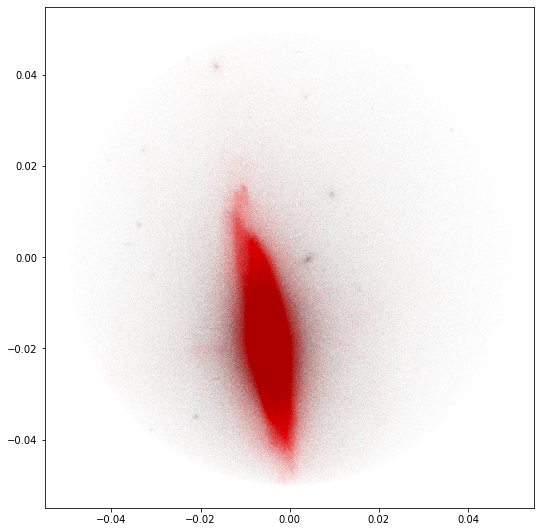

In [38]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.008)


CPU times: user 12.3 s, sys: 2.65 s, total: 14.9 s
Wall time: 1.94 s


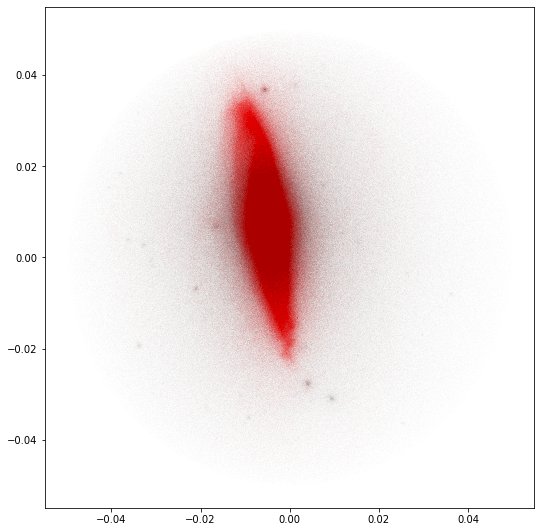

In [39]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],zdrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xstr1[mask_str],zstr1[mask_str],'.r',markersize=0.008)


# Grafico el segundo halo mas masivo

In [56]:
CM2  = SCM[1,:]
SUB2 = SMass[1]

print('mass=',SUB2,'CM=',CM2)

mass= 1169987300000.0 CM= [48.716347 47.062702 53.338043]


In [57]:
xstr2 = pos_str[:,0]-CM2[0]
ystr2 = pos_str[:,1]-CM2[1]
zstr2 = pos_str[:,2]-CM2[2]

xdrk2 = pos_drk[:,0]-CM2[0]
ydrk2 = pos_drk[:,1]-CM2[1]
zdrk2 = pos_drk[:,2]-CM2[2]

In [58]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
mask_str, = np.where(rstr<1)
mask_drk, = np.where(rdrk<1)

CPU times: user 14.4 s, sys: 5.06 s, total: 19.4 s
Wall time: 3.83 s


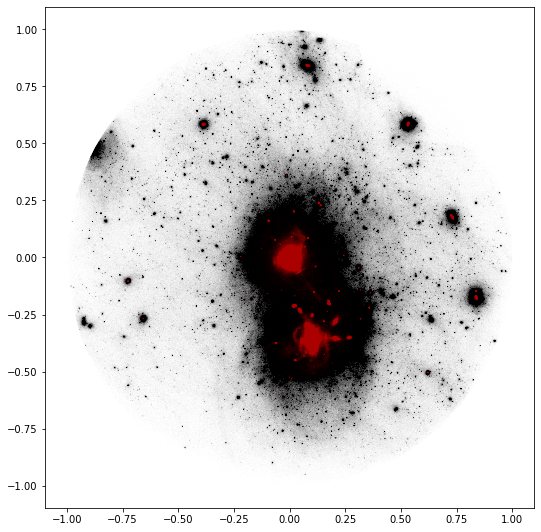

In [59]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.01)


In [60]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
mask_str, = np.where(rstr<0.25)
mask_drk, = np.where(rdrk<0.25)

CPU times: user 12.7 s, sys: 2.67 s, total: 15.4 s
Wall time: 1.74 s


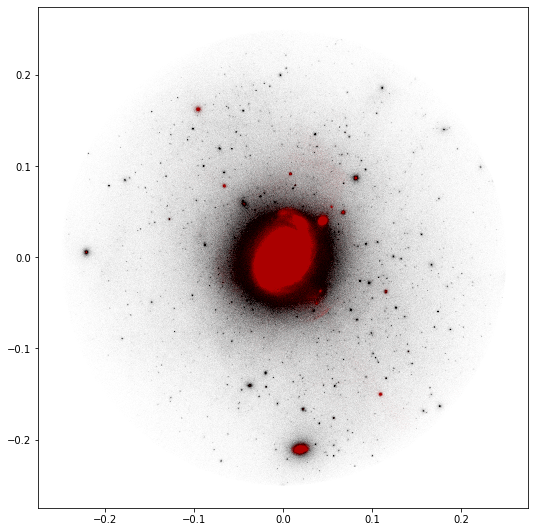

In [61]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.01)


In [62]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
mask_str, = np.where(rstr<0.05)
mask_drk, = np.where(rdrk<0.05)

CPU times: user 12.2 s, sys: 2.08 s, total: 14.3 s
Wall time: 1.15 s


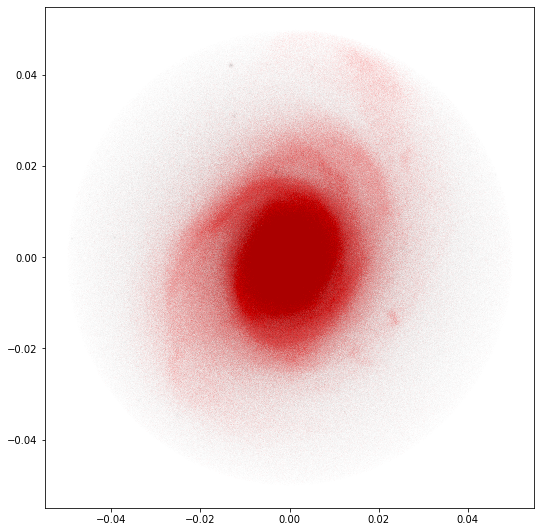

In [63]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.008)


CPU times: user 12.2 s, sys: 1.8 s, total: 14 s
Wall time: 1.05 s


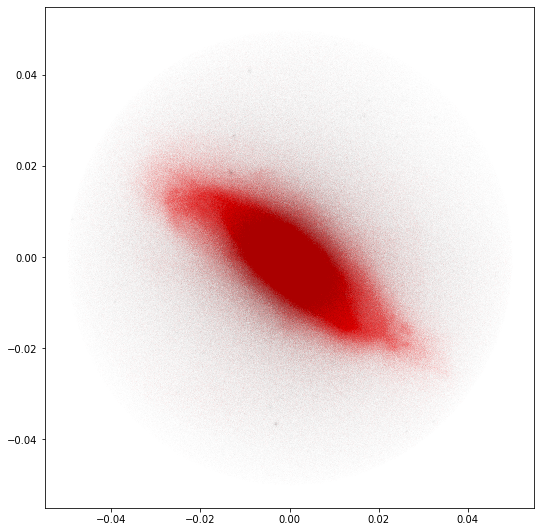

In [64]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],zdrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xstr2[mask_str],zstr2[mask_str],'.r',markersize=0.008)


# Vemos los histogramas de las masas

In [41]:
%%time
import gc
import joblib
import h5py
import pathlib

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')


def load(path):
    with h5py.File(path,'r') as snap:
        Mass0 = snap['PartType0/Masses'][()]
        Mass1 = snap['PartType1/Masses'][()]
        Mass2 = snap['PartType2/Masses'][()]
        Mass3 = snap['PartType3/Masses'][()]
        Mass4 = snap['PartType4/Masses'][()]
        Mass5 = snap['PartType5/Masses'][()]

    return {'M0': Mass0, 'M1': Mass1, 'M2': Mass2,'M3': Mass3,'M4': Mass4,'M5': Mass5}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 2.11 s, sys: 16.1 s, total: 18.2 s
Wall time: 20.7 s


150

In [42]:
%%time
import numpy as np
MASS0 = np.concatenate([r['M0']for r in results])
MASS1 = np.concatenate([r['M1']for r in results])
MASS2 = np.concatenate([r['M2']for r in results])
MASS3 = np.concatenate([r['M3']for r in results])
MASS4 = np.concatenate([r['M4']for r in results])
MASS5 = np.concatenate([r['M5']for r in results])


CPU times: user 22.4 s, sys: 10.6 s, total: 33 s
Wall time: 1.03 s


Text(0.5, 1.0, 'BH')

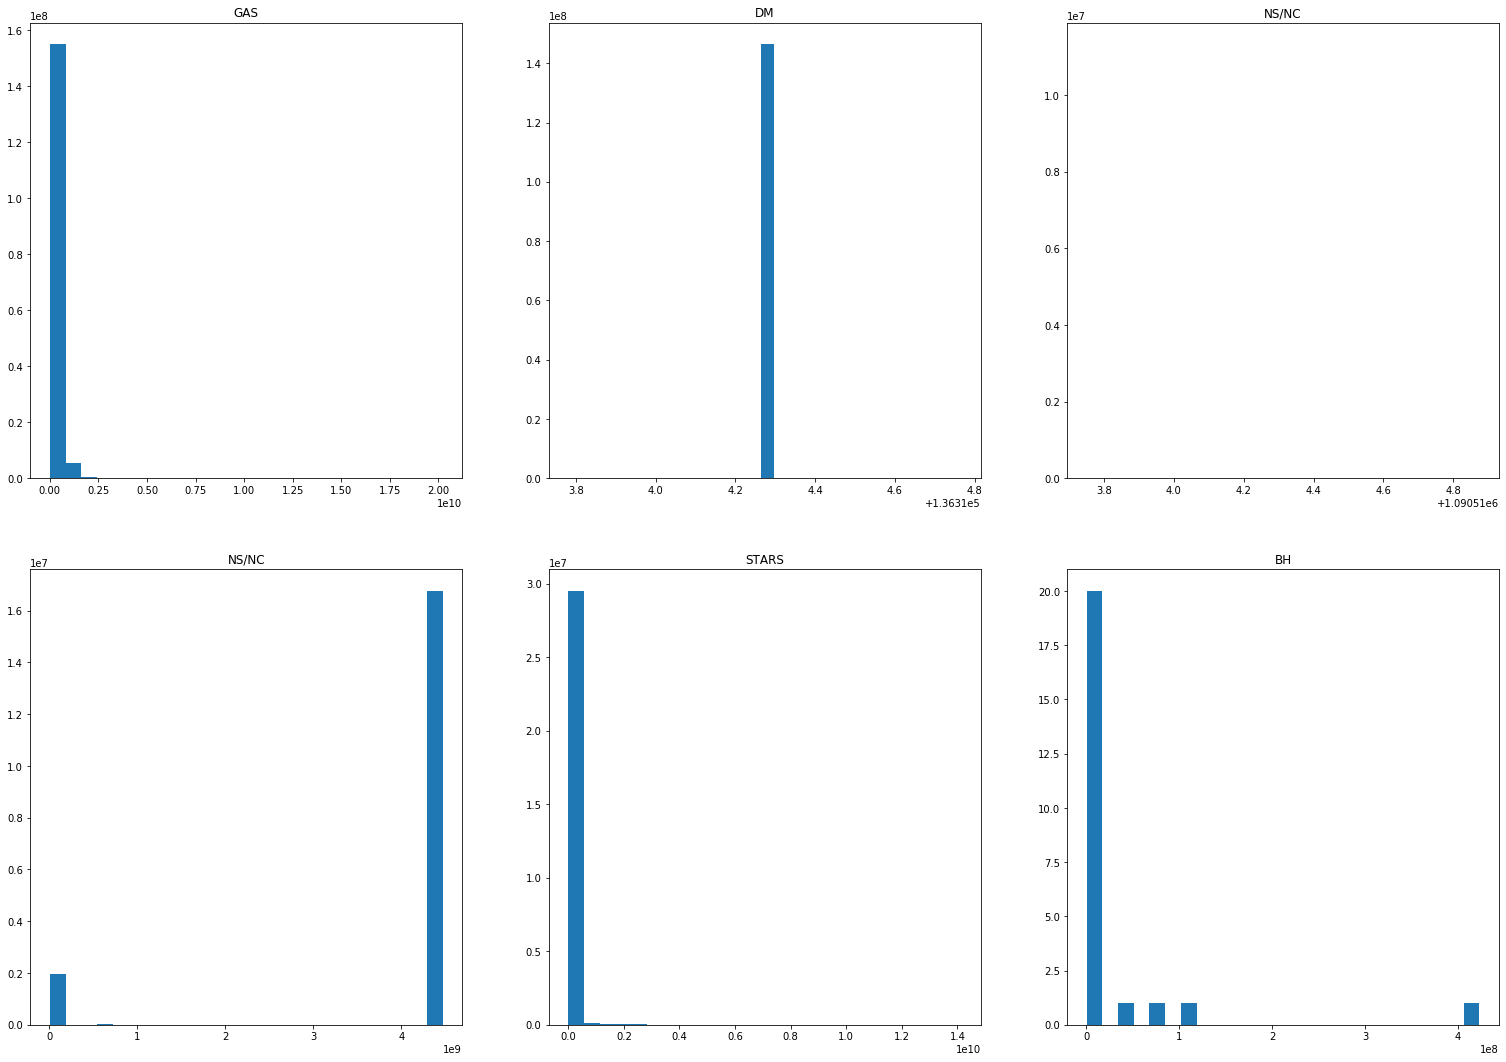

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax[0,0].hist(MASS0*1e10,bins=25)
ax[0,0].set_title('GAS')

ax[0,1].hist(MASS1*1e10,bins=25)
ax[0,1].set_title('DM')

ax[0,2].hist(MASS2*1e10,bins=25)
ax[0,2].set_title('NS/NC')

ax[1,0].hist(MASS3*1e10,bins=25)
ax[1,0].set_title('NS/NC')

ax[1,1].hist(MASS4*1e10,bins=25)
ax[1,1].set_title('STARS')

ax[1,2].hist(MASS5*1e10,bins=25)
ax[1,2].set_title('BH')




In [54]:
MASS0*1e10

array([22251.547, 18033.79 , 18042.361, ..., 20680.863, 30331.514,
       27699.934], dtype=float32)

In [51]:
MASS1*1e10

array([136314.28, 136314.28, 136314.28, ..., 136314.28, 136314.28,
       136314.28], dtype=float32)

In [52]:
MASS4*1e10

array([11857.988, 10214.846, 17880.154, ..., 13042.379, 18149.684,
       16644.602], dtype=float32)